In [1]:
import pandas as pd

file_path = '/Users/mazinrafi/Downloads/Washington Rankings 2023.xlsx'
data = pd.read_excel(file_path)
data

#many metrics to consider, but notably Pell graduates is mentioned. We should discuss more about this for analysis sake. 

/Users/mazinrafi/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Social Mobility,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,SOCIAL MOBILITY OVERALL RANK,RESEARCH OVERALL RANK,SERVICE OVERALL RANK
0,UnitID,Rank,Name,8-year graduation rate,Graduation rate rank,Predicted graduation rate based on % of Pell r...,Graduation rate performance rank,Pell/non-Pell graduation gap,Pell graduation gap rank,Number of Pell graduates,...,ROTC rank,Percent of federal work-study funds spent on s...,Percent of federal work-study funds spent on s...,Earns Carnegie Community Engagement Classifica...,Voting engagement points,Percent of grads with service-oriented majors,Service-oriented majors rank,Social mobility rank,Research rank,Service rank
1,166027,1,Harvard University (MA),0.978043,1,0.876201,21,-0.020423,41,262.3333,...,88,0.197824,22,NO,5,0.180311,292,15,3,19
2,243744,2,Stanford University (CA),0.964173,5,0.947973,176,-0.031586,70,256.6667,...,292,0.239987,11,NO,3,0.069235,399,6,2,169
3,166683,3,MA Institute of Technology (MA),0.958662,9,0.991628,324,-0.036022,89,187,...,9,0.051687,329,NO,3,0,436,3,1,274
4,215062,4,University of Pennsylvania (PA),0.966665,4,0.941859,153,-0.030094,67,368,...,243,0.145413,67,YES,6,0.24082,212,2,9,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,137564,438,Southeastern University (FL),0.471961,397,0.554491,405,-0.136172,328,199,...,291,0.054447,318,NO,0,0.216838,241,432,431,419
439,137476,439,St. Thomas University (FL),0.512572,362,0.49773,179,-0.135494,324,102,...,395,0,426,NO,0,0.267987,185,433,417,430
440,117751,440,Master's University (CA),0.534371,331,0.556575,289,-0.295894,440,68.33334,...,333,0.125378,97,NO,0,0.033459,418,438,365,423
441,413413,441,Capella University (MN)°,0.181224,441,0.362795,439,-1,441,490.6667,...,395,0.038911,374,NO,0,0.537294,42,441,435,390


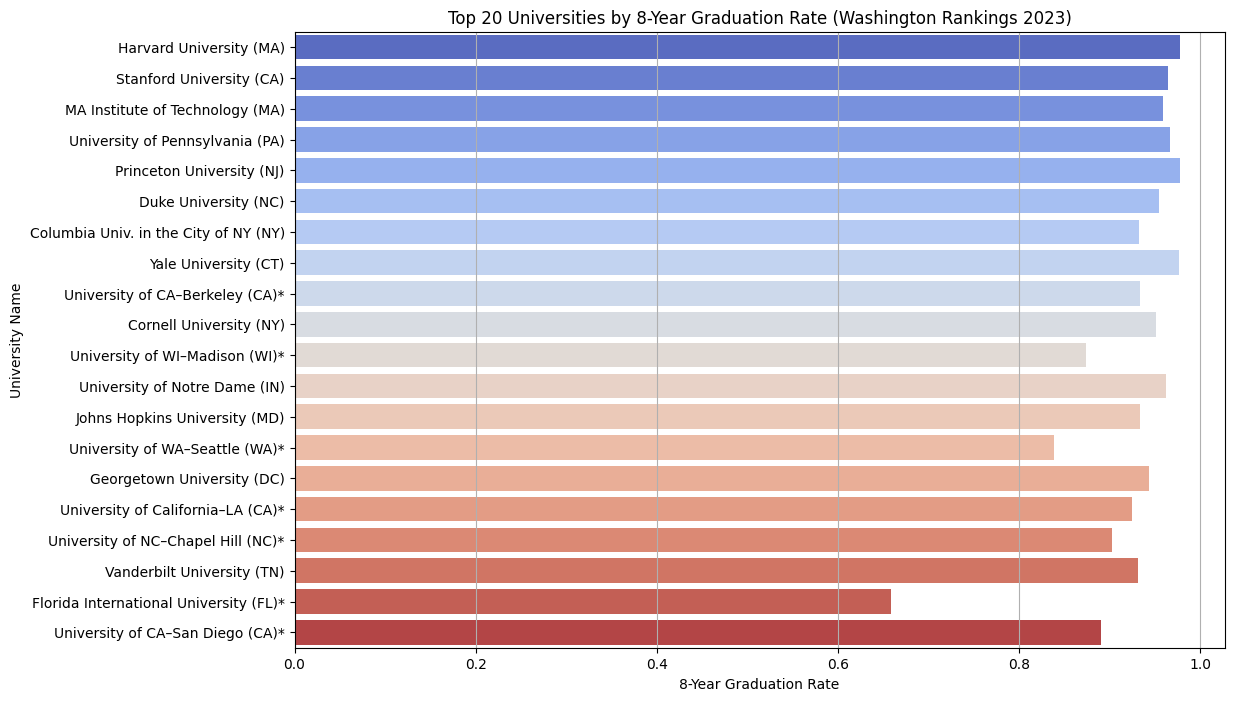

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data
# Dropping the first row which contains subheaders and renaming columns based on the first row
data.columns = data.iloc[0]
data = data.drop(0)

# Selecting relevant columns for the visualization
#relevant_columns = ['Rank', 'Name', '8-year graduation rate', 'Graduation rate rank', 'Social mobility rank', 'Research rank']
cleaned_data = data

# Converting numerical columns to appropriate data types
cleaned_data['Rank'] = pd.to_numeric(cleaned_data['Rank'], errors='coerce')
cleaned_data['8-year graduation rate'] = pd.to_numeric(cleaned_data['8-year graduation rate'], errors='coerce')

# Sorting the data based on Rank and selecting the top 20 universities for a clear visualization
top_universities = cleaned_data.sort_values('Rank').head(20)

# Plotting the top universities based on their overall rank
plt.figure(figsize=(12, 8))
sns.barplot(x='8-year graduation rate', y='Name', data=top_universities, palette='coolwarm')
plt.title('Top 20 Universities by 8-Year Graduation Rate (Washington Rankings 2023)')
plt.xlabel('8-Year Graduation Rate')
plt.ylabel('University Name')
plt.grid(axis='x')
plt.show()

#largely consistent with some interesting changes throughout the top 20. 
#* indicates that it's a public university. 

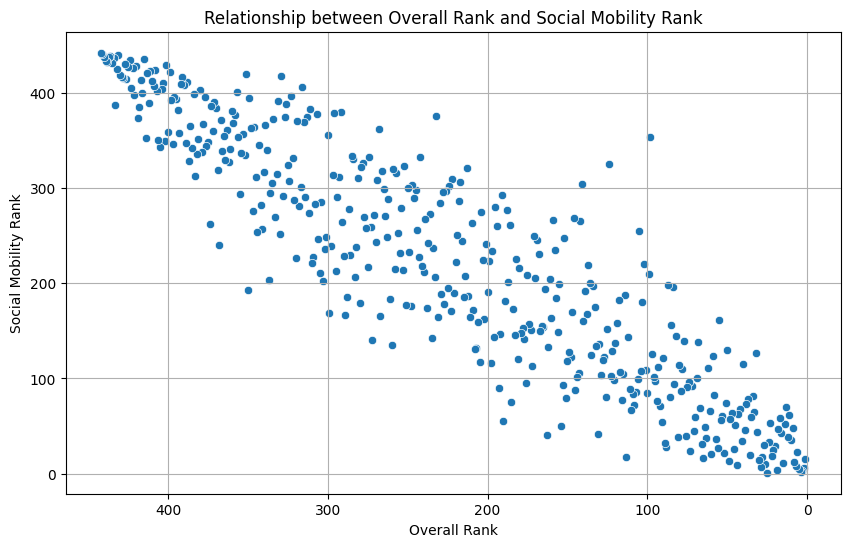

In [3]:
cleaned_data['Social mobility rank'] = pd.to_numeric(cleaned_data['Social mobility rank'], errors='coerce')

# Plotting the relationship between Overall Rank and Social Mobility Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Social mobility rank', data=cleaned_data)
plt.title('Relationship between Overall Rank and Social Mobility Rank')
plt.xlabel('Overall Rank')
plt.ylabel('Social Mobility Rank')
plt.gca().invert_xaxis()  # Invert x-axis to show the highest rank (1) on the left
plt.grid(True)
plt.show()

#the better the rank, the better the social mobility rank. 
#an interesting outlier for rank was the University of Montana. Overall 98 but 354th by Social Mobility
#the same one ranked highest by military rank. 
#The University seems to be a very interesting outlier in this dataset. 

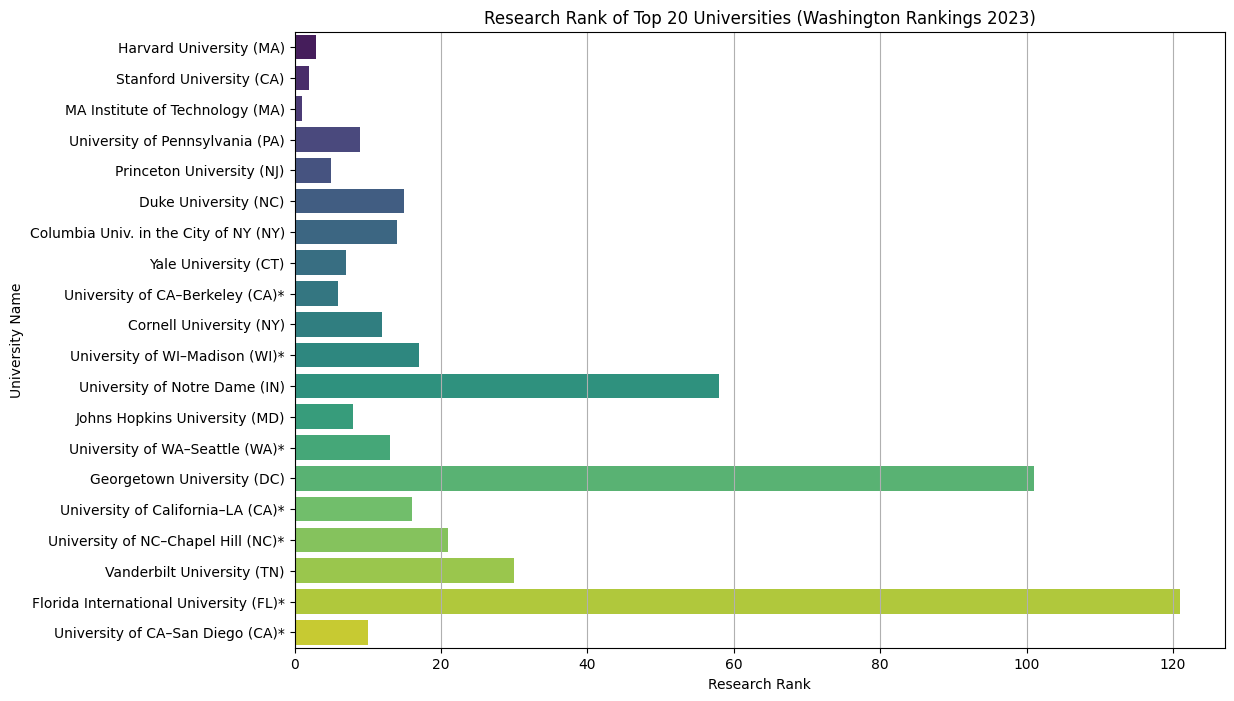

In [4]:
# Converting 'Research rank' to numeric for plotting
cleaned_data['Research rank'] = pd.to_numeric(cleaned_data['Research rank'], errors='coerce')

# Sorting the data based on Rank and selecting the top 20 universities
top_research_universities = cleaned_data.sort_values('Rank').head(20)

# Plotting the research rank of the top 20 universities
plt.figure(figsize=(12, 8))
sns.barplot(x='Research rank', y='Name', data=top_research_universities, palette='viridis')
plt.title('Research Rank of Top 20 Universities (Washington Rankings 2023)')
plt.xlabel('Research Rank')
plt.ylabel('University Name')
plt.grid(axis='x')
plt.show()

#research seemed to be insignificant for later overall rankings, but still important for top ranking universities. 

/Users/mazinrafi/miniconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


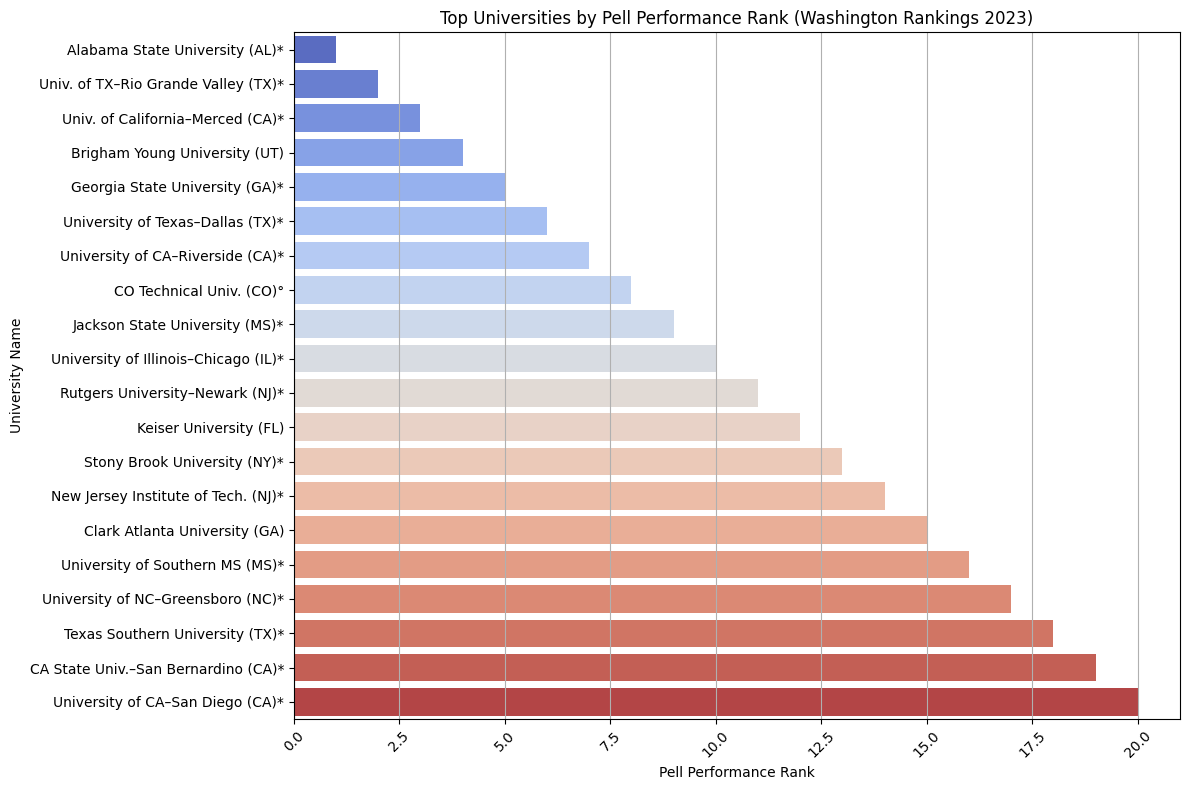

In [5]:
data_reloaded = pd.read_excel(file_path)

# Setting the first row as the header
data_corrected = data_reloaded.copy()
data_corrected.columns = data_corrected.iloc[0]  # Set the first row as column headers
data_corrected = data_corrected.drop(data_corrected.index[0])  # Drop the first row after setting it as headers

# Ensuring that the 'Pell performance rank' column is correctly identified and processed
data_corrected['Pell performance rank'] = pd.to_numeric(data_corrected['Pell performance rank'], errors='coerce')

# Sorting the data by Pell Performance Rank to get the top universities
top_pell_rank_universities = data_corrected.sort_values('Pell performance rank').head(20)

# Plotting the top universities based on Pell Performance Rank
plt.figure(figsize=(12, 8))
sns.barplot(x='Pell performance rank', y='Name', data=top_pell_rank_universities, palette='coolwarm')
plt.title('Top Universities by Pell Performance Rank (Washington Rankings 2023)')
plt.xlabel('Pell Performance Rank')
plt.ylabel('University Name')
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#no strong correlation between pell rank and overall rank (as seen in the data as well.)
#very important finding for the paper; will discuss in report. 

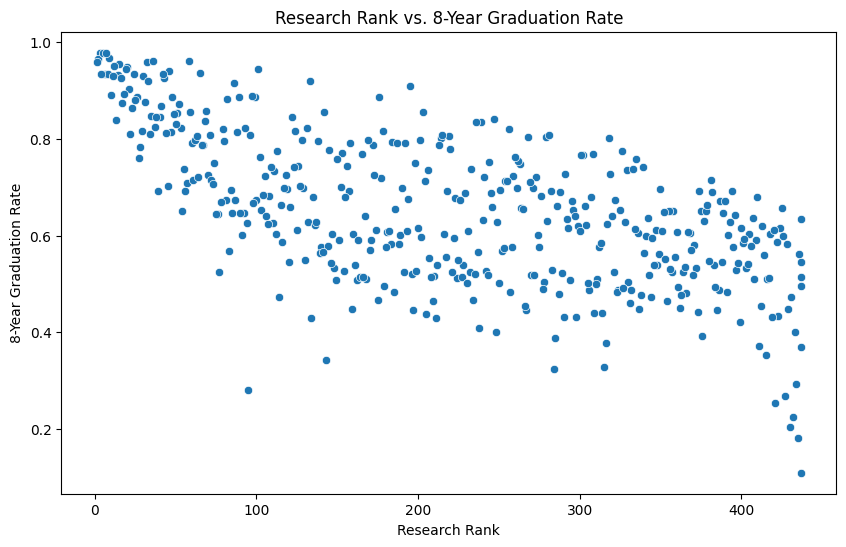

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_data['Research rank'].astype(float), y=cleaned_data['8-year graduation rate'].astype(float))
plt.title('Research Rank vs. 8-Year Graduation Rate')
plt.xlabel('Research Rank')
plt.ylabel('8-Year Graduation Rate')
plt.show()

#Interesting visual trend, but still an expected find: better research rate, 
#then there will be more likely  

#Interesting outlier: 95th by research is Walden University (436 overall out of 442), 
#but has a 22% 8-Year Graduation.
#some outside findings show that retention rate (meaning likelihood to return next year) 
#among freshmens is incredibly low at Walden University. 
#It's not entirely clear why, but most likely caused by the poor reputation/ranking. 

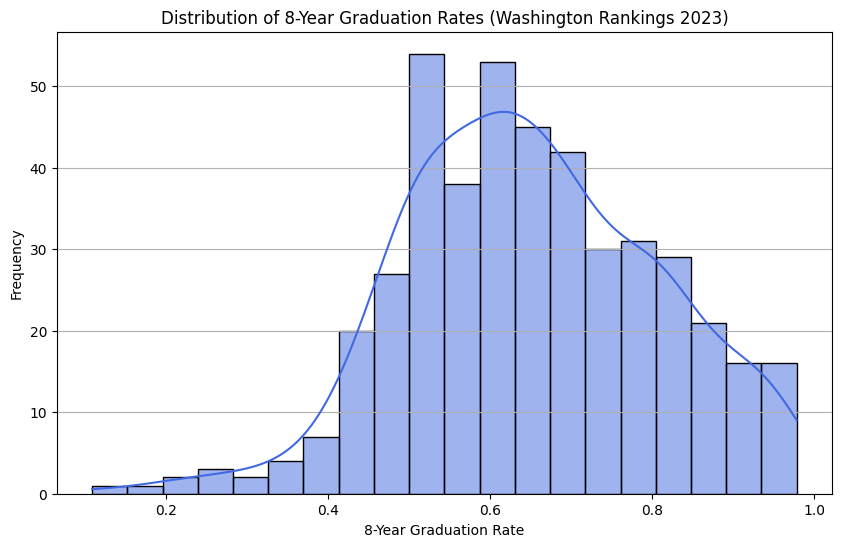

In [7]:
# Plotting the histogram for the distribution of 8-year graduation rates
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['8-year graduation rate'].dropna(), bins=20, kde=True, color='royalblue')
plt.title('Distribution of 8-Year Graduation Rates (Washington Rankings 2023)')
plt.xlabel('8-Year Graduation Rate')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

#a solid distribution that appears normal with an above average (more than 50%) mean. 
#some skewness to the left which is a good thing to find!

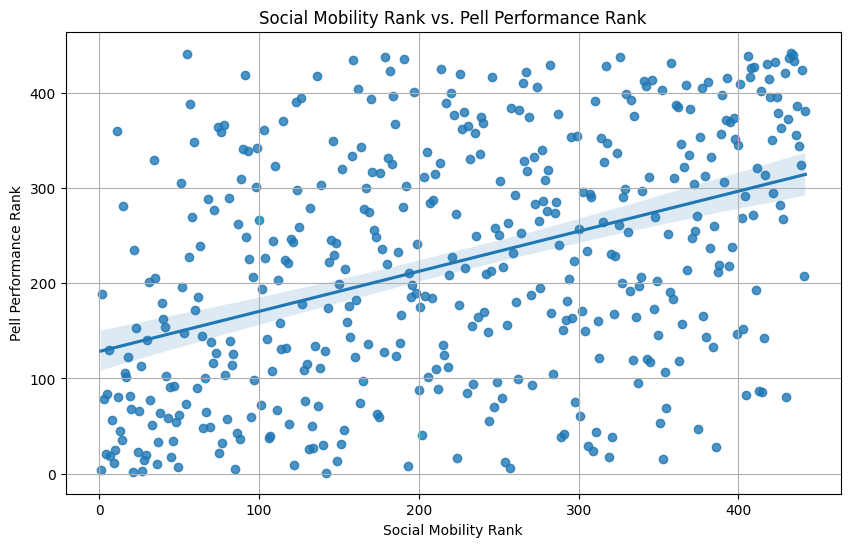

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(x=cleaned_data['Social mobility rank'].astype(float), y=cleaned_data['Pell performance rank'].astype(float))
plt.title('Social Mobility Rank vs. Pell Performance Rank')
plt.xlabel('Social Mobility Rank')
plt.ylabel('Pell Performance Rank')
plt.grid(True)
plt.show()

#slight but weak positive correlation between social mobility and pell performance rank. 
#i.e better social mobility, better pell performance
#could still be useful in a predictive model. 

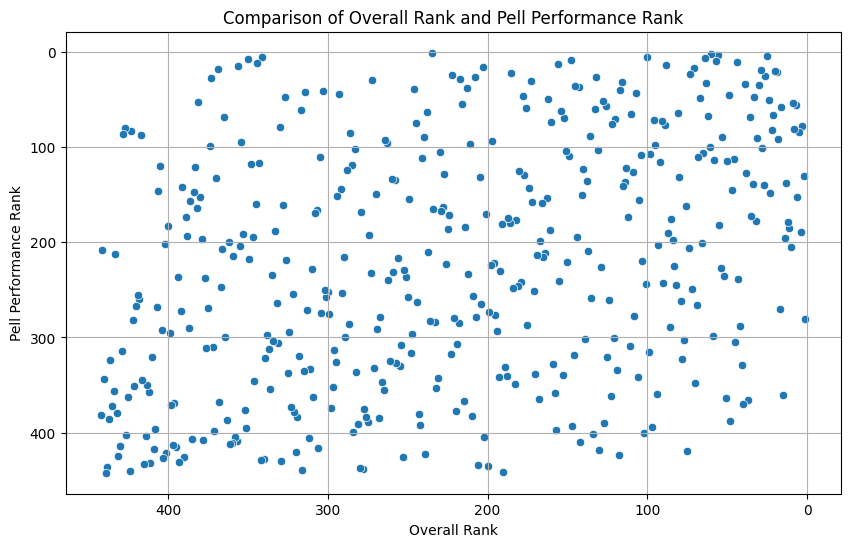

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the data is in the correct format (numeric)
cleaned_data['Rank'] = pd.to_numeric(cleaned_data['Rank'], errors='coerce')
cleaned_data['Pell performance rank'] = pd.to_numeric(cleaned_data['Pell performance rank'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Pell performance rank', data=cleaned_data)

plt.title('Comparison of Overall Rank and Pell Performance Rank')
plt.xlabel('Overall Rank')
plt.ylabel('Pell Performance Rank')
plt.gca().invert_xaxis()  # Invert x-axis if lower ranks are better (common in ranking systems)
plt.gca().invert_yaxis()  # Invert y-axis if lower ranks are better
plt.grid(True)
plt.show()

#main finding: no strong correlation between pell performance (with/without line)
#a disappointing find, as one would expect a high ranking university to be strongly correlated 
#with proper financial aid to students. This hints at a socioeconomic disparity. 

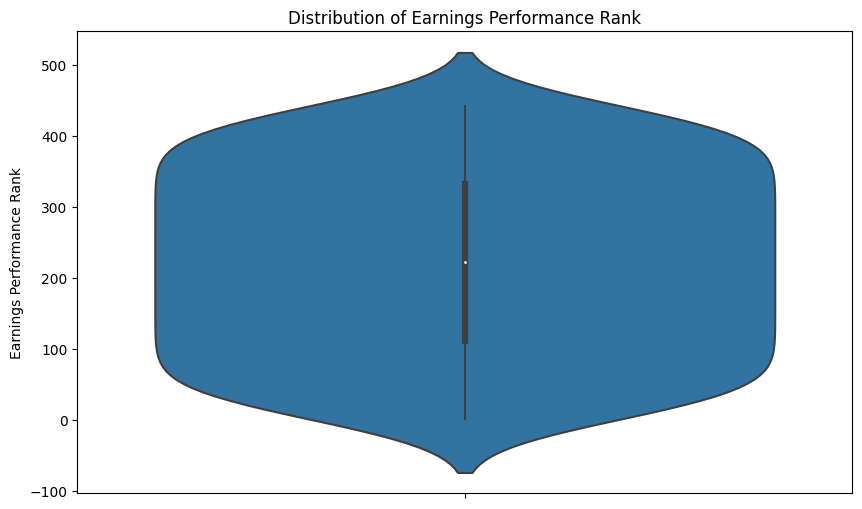

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=cleaned_data['Earnings performance rank'].astype(float))
plt.title('Distribution of Earnings Performance Rank')
plt.ylabel('Earnings Performance Rank')
plt.show()

#produced by GPT; not a very useful plot. 

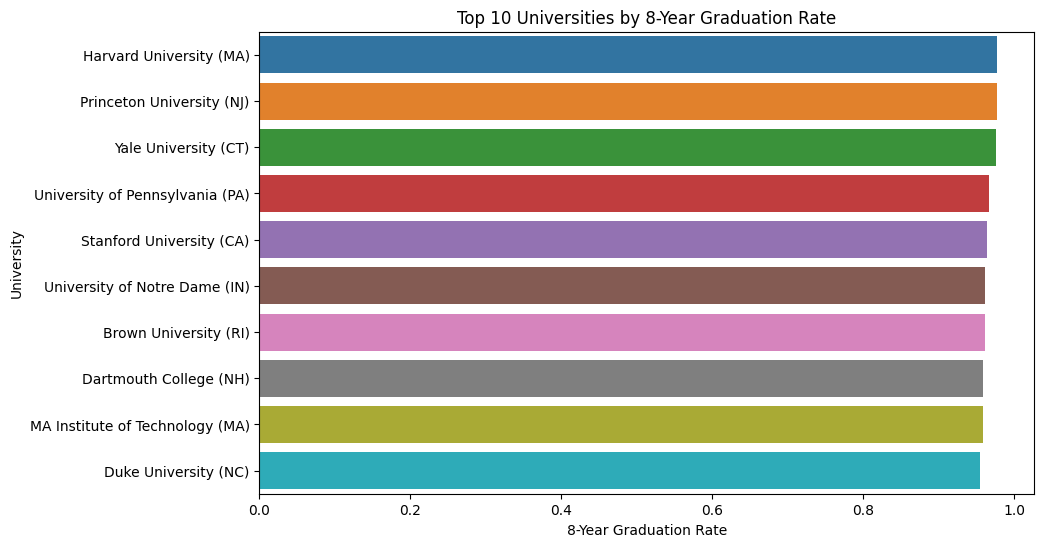

In [11]:
top_graduation_rates = cleaned_data.nlargest(10, '8-year graduation rate')[['Name', '8-year graduation rate']].astype({'8-year graduation rate': float})
plt.figure(figsize=(10, 6))
sns.barplot(x='8-year graduation rate', y='Name', data=top_graduation_rates)
plt.title('Top 10 Universities by 8-Year Graduation Rate')
plt.xlabel('8-Year Graduation Rate')
plt.ylabel('University')
plt.show()
#Graduation Rates are very strong with Ivy Leagues/other colleges. 